In [1]:
import torch
import torch.nn.functional as F
from model import POCML
from dataloader import GraphEnv, DataLoader, Env

import pickle
import evaluate

In [2]:
with open("data/data_n_nodes_9_env_grid_traj_len_12_n_traj_1536_args_{'rows': 3, 'cols': 3}_seed_65.pickle", "rb") as f:
    p = pickle.load(f)
env = p["env"]

In [3]:
state_dim = 20
batch_size = 64
random_feature_dim = 2000

model = POCML(
    n_obs = env.n_items,
    n_states = env.size,
    n_actions = env.n_actions,
    state_dim = state_dim,
    batch_size=batch_size,
    random_feature_dim = random_feature_dim,
    alpha = 4,
    memory_bias=False,
)

model.load_state_dict(torch.load("model/grid_{'rows': 3, 'cols': 3}_sdim_20_rfdim_2000_lrV_0.1_seed_66.ckpt"))

model.batch_size = 1

In [4]:
ps = evaluate.test_two_tunnel(model)


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1]]) tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0.]])
tensor([[1.8384e-02, 1.0043e-02, 9.0812e-02, 7.6223e-07, 7.0807e-02, 7.5758e-01,
         7.6223e-07, 6.5530e-03, 4.5822e-02]]) tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[1.0250e-06, 1.3987e-01, 7.4388e-01, 1.0250e-06, 2.1126e-02, 9.5123e-02,
         1.0250e-06, 1.0250e-06, 1.0250e-06]]) tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0.]])
tensor([[1.6845e-01, 6.0568e-01, 3.4019e-02, 3.9340e-02, 1.2903e-01, 1.3547e-02,
         8.1100e-07, 2.4564e-04, 9.6957e-03]]) tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[6.4451e-01, 7.0240e-02, 1.0526e-06, 1.7699e-01, 3.5996e-02, 1.0375e-02,
         8.3731e-03, 2.4109e-02, 2.9408e-02]]) tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[3.2749e-02, 5.5240e-03, 8.6290e-07, 5.6743e-01, 1.0524e-01, 8.6290e-07,
         2.0606e-01, 6.2373e-02, 2.0623e-02]]) tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[6.9615e-03, 1.2600e-06, 1.2600e

<Figure size 6400x4800 with 0 Axes>

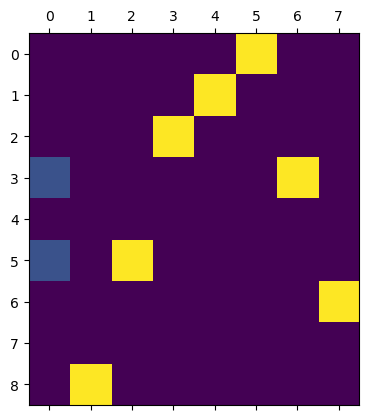

In [9]:
import matplotlib.pyplot as plt
plt.figure(dpi=1000)
plt.matshow(ps)